In [8]:
import pandas as pd

file = "C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/Espeletia_completo_NASADEM.csv"
data = pd.read_csv(file, sep=",", encoding="utf-8")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24069 entries, 0 to 24068
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   system:index   24069 non-null  object 
 1   countryCode    24069 non-null  object 
 2   elevation      16812 non-null  float64
 3   elevation_DEM  24069 non-null  int64  
 4   eventDate      23804 non-null  object 
 5   genus          24069 non-null  object 
 6   lat            24069 non-null  float64
 7   locality       21924 non-null  object 
 8   lon            24069 non-null  float64
 9   species        22826 non-null  object 
 10  stateProvince  23001 non-null  object 
 11  .geo           24069 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.2+ MB


In [10]:
data.describe(include="all")

,system:index,countryCode,elevation,elevation_DEM,eventDate,genus,lat,locality,lon,species,stateProvince,.geo
count,24069,24069,16812.000000,24069.000000,23804,24069,24069.000000,21924,24069.000000,22826,23001,24069
unique,24069,3,NaN,NaN,3595,1,NaN,3003,NaN,148,58,4998
top,00000000000000000515_0,CO,NaN,NaN,18/03/2014,Espeletia,NaN,Parque Nacional Natural del Cocuy,NaN,Espeletia grandiflora,Cundinamarca,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
freq,1,21277,NaN,NaN,541,24069,NaN,3195,NaN,3204,6017,636
mean,NaN,NaN,3406.786122,3391.580622,NaN,NaN,5.194201,NaN,-73.928635,NaN,NaN,NaN
std,NaN,NaN,333.815246,565.350288,NaN,NaN,2.048019,NaN,1.870941,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,-2.816658,NaN,-78.916667,NaN,NaN,NaN
25%,NaN,NaN,3260.750000,3227.000000,NaN,NaN,4.528400,NaN,-75.279998,NaN,NaN,NaN
50%,NaN,NaN,3430.000000,3411.000000,NaN,NaN,5.412390,NaN,-73.814612,NaN,NaN,NaN
75%,NaN,NaN,3580.000000,3624.000000,NaN,NaN,6.347860,NaN,-72.590749,NaN,NaN,NaN


In [11]:
data.columns

Index(['system:index', 'countryCode', 'elevation', 'elevation_DEM',
       'eventDate', 'genus', 'lat', 'locality', 'lon', 'species',
       'stateProvince', '.geo'],
      dtype='object')

In [12]:
data.isna().sum()

system:index        0
countryCode         0
elevation        7257
elevation_DEM       0
eventDate         265
genus               0
lat                 0
locality         2145
lon                 0
species          1243
stateProvince    1068
.geo                0
dtype: int64

In [13]:
# ¿Qué tan precisa fue la asigación de elevación a partir del DEM?
import numpy as np
import matplotlib.pyplot as plt

# Filtrar datos donde ambas columnas no sean NaN
valid_data = data.dropna(subset=['elevation', 'elevation_DEM'])

# Calcular diferencias
valid_data['error'] = valid_data['elevation_DEM'] - valid_data['elevation']

# Métricas de error
mae = np.mean(np.abs(valid_data['error']))  # Error absoluto medio
rmse = np.sqrt(np.mean(valid_data['error']**2))  # Error cuadrático medio
correlation = valid_data[['elevation', 'elevation_DEM']].corr().iloc[0, 1]  # Correlación

# Imprimir resultados
print(f"MAE (Error Absoluto Medio): {mae}")
print(f"RMSE (Error Cuadrático Medio): {rmse}")
print(f"Correlación: {correlation}")

MAE (Error Absoluto Medio): 94.6037250178444
RMSE (Error Cuadrático Medio): 292.2418577839795
Correlación: 0.716571485736449


C:\Users\danie\AppData\Local\Temp\ipykernel_12644\1790592633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['error'] = valid_data['elevation_DEM'] - valid_data['elevation']


In [21]:
# ¿Que errores son mayores a 500 m?
valid_data[valid_data['error'].abs() > 500]

,system:index,countryCode,elevation,elevation_DEM,eventDate,genus,lat,locality,lon,species,stateProvince,.geo,error
754,00000000000000002313_0,CO,3650.0,2793,14/11/1998,Espeletia,5.499998,Munic. Toca. Paramo Cortadero. On the ridge ne...,-73.250001,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-857.0
757,00000000000000002324_0,CO,3650.0,2793,14/11/1998,Espeletia,5.499998,"Munic. Toca. Paramo Cortadero. On the ridge, k...",-73.250001,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-857.0
758,00000000000000002325_0,CO,3650.0,2793,14/11/1998,Espeletia,5.499998,Munic. Toca. Paramo Cortadero. On the ridge cc...,-73.250001,Espeletia congestiflora,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-857.0
759,00000000000000002326_0,CO,3650.0,2793,14/11/1998,Espeletia,5.499998,Munic. Toca. Paramo Cortadero. On the ridge ne...,-73.250001,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-857.0
760,00000000000000002327_0,CO,3550.0,2793,14/11/1998,Espeletia,5.499998,Munic. Toca. Paramo Cortadero. Grassy paramo b...,-73.250001,Espeletia jimenez-quesadae,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23983,000000000000000024f2_0,CO,3700.0,1560,22/03/1946,Espeletia,3.869693,"Páramo de Las Vegas, ríos Tuluá y Bugalagrande",-76.525804,Espeletia hartwegiana,Valle del Cauca,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-2140.0
23984,000000000000000024f3_0,CO,3700.0,1560,22/03/1946,Espeletia,3.869693,"Páramo de Las Vegas, ríos Tuluá y Bugalagrande",-76.525804,Espeletia hartwegiana,Valle del Cauca,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-2140.0
23985,000000000000000024fb_0,CO,3700.0,1560,22/03/1946,Espeletia,3.869693,"Cordillera Central, vertiente W, Páramo de Las...",-76.525804,NaN,Valle del Cauca,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-2140.0
23996,00000000000000002df6_0,CO,3600.0,10,29/01/1998,Espeletia,3.750001,Páramo de Pan de Azúcar.,-77.083334,Espeletia hartwegiana,Valle del Cauca,"{""geodesic"":false,""type"":""Point"",""coordinates""...",-3590.0


In [24]:
(valid_data['error'] > 300).sum()

np.int64(340)

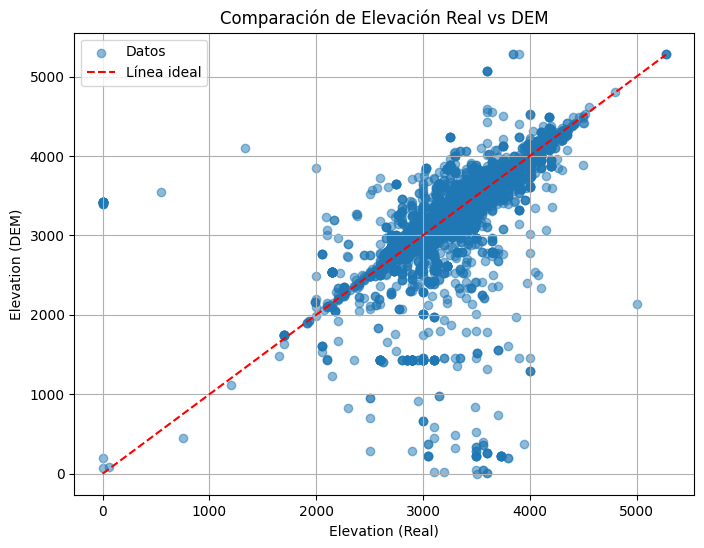

In [14]:
# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(valid_data['elevation'], valid_data['elevation_DEM'], alpha=0.5, label="Datos")
plt.plot([valid_data['elevation'].min(), valid_data['elevation'].max()],
         [valid_data['elevation'].min(), valid_data['elevation'].max()],
         color='red', linestyle='--', label="Línea ideal")
plt.xlabel("Elevation (Real)")
plt.ylabel("Elevation (DEM)")
plt.title("Comparación de Elevación Real vs DEM")
plt.legend()
plt.grid()
plt.show()

### Filtros ecológicos  

Se aplica un filtro a partir de la elevación, excluyendo observaciones por debajo de 2500 msnm

In [ ]:
(data['elevation_DEM'] < 2800).sum()  # Conteo de valores menores a 2500 m
print(f"Encontramos {(data['elevation_DEM'] < 2800).sum()} reportes menores a 2800 m en la columna 'elevation_DEM'.")

Encontramos 1760 valores menores a 2800 m en la columna 'elevation_DEM'.


In [39]:
data.columns

Index(['system:index', 'countryCode', 'elevation', 'elevation_DEM',
       'eventDate', 'genus', 'lat', 'locality', 'lon', 'species',
       'stateProvince', '.geo'],
      dtype='object')

In [47]:
# Eliminamos los valores menores a 2800 m
data_filtered = data[data['elevation_DEM'] >= 2800]
data_filtered = data_filtered.drop(columns=['system:index', 'elevation'])
print(f"Nos quedamos con {data_filtered.shape[0]} observaciones después de filtrar.")

Nos quedamos con 22309 observaciones después de filtrar.


In [ ]:
# Salvamos el nuevo archivo en la carpeta 'data'
#data_filtered.to_csv("C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/Espeletia_NASADEM_filt.csv", index=False, encoding="utf-8")
#data_filtered.to_csv("../data/Espeletia_NASADEM_filt.csv", index=False, encoding="utf-8")